### Linear Regression - Practical Implementation {tutorial code along}

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('HousingData.csv')

In [4]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
dataset.fillna(dataset.mean(), inplace=True)

In [7]:
X = dataset.drop('MEDV', axis=1)
y = dataset.MEDV

In [8]:
#train-test=split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [9]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [12]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
mse = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error', cv = 6)

In [14]:
np.mean(mse)

-26.43748691471507

In [15]:
# prediction 
reg_predict = regression.predict(X_test)

In [16]:
reg_predict

array([28.94684244, 37.080947  , 15.16334344, 25.59977001, 18.52050399,
       22.92953198, 17.99840423, 14.43800382, 22.06639946, 20.81944231,
       25.11881906, 18.72123522, -6.3071011 , 21.86734043, 19.02489041,
       25.40599155, 19.37239698,  5.95086419, 40.85794132, 17.18432226,
       24.93251127, 30.36869589, 11.39935905, 22.76748541, 17.50857422,
       15.11943012, 21.39728476, 14.47830797, 23.13536511, 19.56542429,
       22.18119889, 25.26140438, 25.38274556, 17.33845553, 16.24266113,
       17.25502918, 30.91188566, 20.39390975, 24.67921133, 22.85756708,
       14.52166278, 31.79401526, 42.81650058, 17.99338659, 27.3605525 ,
       16.56320925, 13.95314318, 26.53462251, 19.75194991, 30.2586963 ,
       21.02578   , 33.48015966, 15.97922002, 26.27389748, 39.58817583,
       22.50675409, 18.73574376, 33.02789505, 25.25340181, 13.16505164,
       22.85496664, 31.01835795, 31.53871931, 16.756762  , 21.22003054,
       17.10830699, 19.99132099, 26.38841982, 31.29685552, 11.72

<Axes: xlabel='MEDV', ylabel='Density'>

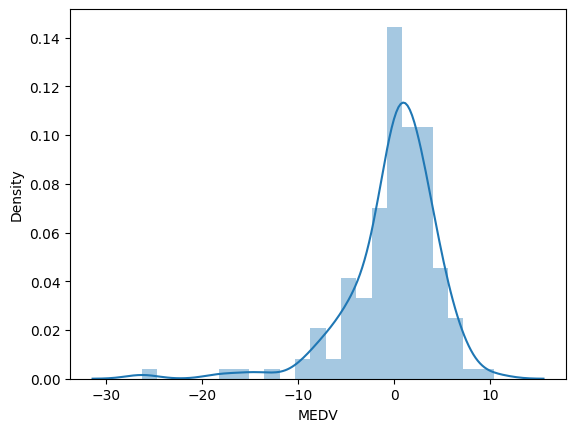

In [17]:
import seaborn as sns
sns.distplot(reg_predict-y_test, kde = True)

In [18]:
from sklearn.metrics import r2_score

In [19]:
score = r2_score(reg_predict, y_test)

In [20]:
score

0.6654870568426416

In [21]:
# from sklearn.ensemble import GradientBoostingRegressor
# gbr = GradientBoostingRegressor(random_state=0)
# gbr.fit(X_train, y_train)
# gbr.score(X_test, y_test)

# L1 and L2 regularization

## Ridge Regression (L2)

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [23]:
ridge_regressor = Ridge()

In [24]:
parameters={'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [25]:

print(ridgecv.best_params_)

{'alpha': 20}


In [26]:

print(ridgecv.best_score_)


-26.812260378937047


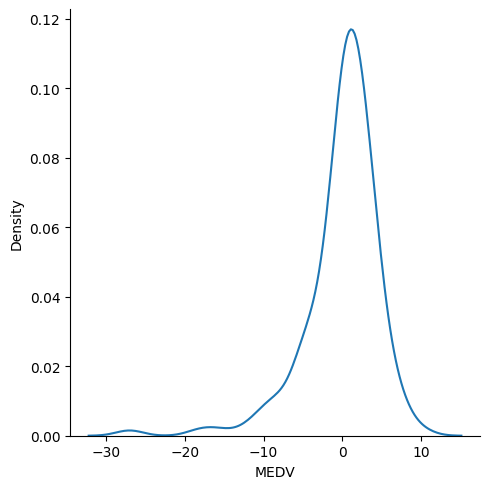

In [27]:
ridge_pred=ridgecv.predict(X_test)
import seaborn as sns
sns.displot(ridge_pred-y_test,kind='kde')

In [32]:
scoreR=r2_score(ridge_pred,y_test)
score

0.6277648668733488

## Lasso Regression (L1)

In [33]:
from sklearn.linear_model import Lasso
lasso=Lasso()
parameters={'alpha':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90]}
lassocv=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lassocv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [34]:
print(lassocv.best_params_)
print(lassocv.best_score_)

{'alpha': 1}
-32.27290986711804


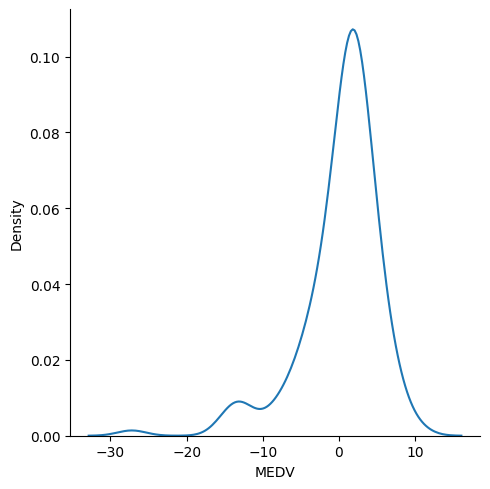

In [35]:
lasso_pred=lassocv.predict(X_test)
import seaborn as sns
sns.displot(lasso_pred-y_test,kind='kde')

In [38]:
scoreL=r2_score(lasso_pred,y_test)
scoreL

0.32194166247933886